In [1]:
import pandas as pd
import altair as alt

#### Import data

In [2]:
desert_df= pd.read_csv('../data/raw/Food_Desert_2015.csv')

In [3]:
desert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             3143 non-null   int64 
 1   fips             3143 non-null   int64 
 2   state_fips       3143 non-null   int64 
 3   county_fips      3143 non-null   int64 
 4   county_name      3143 non-null   object
 5   state_name       3143 non-null   object
 6   state_abbr       3143 non-null   object
 7   metro_nonmetro   3143 non-null   object
 8   desert_pop_2010  3143 non-null   int64 
 9   total_pop_2010   3143 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 245.7+ KB


#### Clean up columns

In [4]:
desert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             3143 non-null   int64 
 1   fips             3143 non-null   int64 
 2   state_fips       3143 non-null   int64 
 3   county_fips      3143 non-null   int64 
 4   county_name      3143 non-null   object
 5   state_name       3143 non-null   object
 6   state_abbr       3143 non-null   object
 7   metro_nonmetro   3143 non-null   object
 8   desert_pop_2010  3143 non-null   int64 
 9   total_pop_2010   3143 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 245.7+ KB


In [5]:
desert_df = desert_df[['year','county_name', 'state_name', 'state_abbr', 'metro_nonmetro', 'desert_pop_2010', 'total_pop_2010']]

In [6]:
grouped = desert_df.groupby("county_name")["state_name"].count()

In [7]:
grouped.head()

county_name
Abbeville County    1
Acadia Parish       1
Accomack County     1
Ada County          1
Adair County        4
Name: state_name, dtype: int64

#### Get counties grouped by states and only find states with mean food desert populations over 500k

In [8]:
desert_df[desert_df['desert_pop_2010'] > 500000].groupby("state_name").mean()

,year,desert_pop_2010,total_pop_2010
state_name,,,
Arizona,2015.0,1.446218e+06,3.817117e+06
California,2015.0,8.940330e+05,3.533004e+06
Florida,2015.0,5.802725e+05,1.139895e+06
Georgia,2015.0,5.845397e+05,8.046600e+05
Illinois,2015.0,8.518610e+05,5.194675e+06
Massachusetts,2015.0,6.985940e+05,1.503085e+06
Michigan,2015.0,6.400590e+05,1.202362e+06
Minnesota,2015.0,5.280950e+05,1.152425e+06
Missouri,2015.0,5.669840e+05,9.989540e+05


### What states have the largest number of total citizens living in a food desert? (at least 1,000,000 in a food desert)

In [9]:
desert_df[desert_df['desert_pop_2010'] > 1000000].groupby("state_name").mean().sort_values('desert_pop_2010', ascending=False).head(10)

,year,desert_pop_2010,total_pop_2010
state_name,,,
Arizona,2015.0,1446218.0,3817117.0
Texas,2015.0,1433914.0,2950746.5
California,2015.0,1190613.0,6004123.0


#### What states in the US have the smallest number of total citizens living in food deserts?

In [10]:
desert_df.groupby("state_name").mean().sort_values('desert_pop_2010', ascending=True).head(10)

,year,desert_pop_2010,total_pop_2010
state_name,,,
North Dakota,2015.0,7039.792453,12690.396226
South Dakota,2015.0,7894.015152,12336.060606
Montana,2015.0,8513.464286,17668.125000
Nebraska,2015.0,9113.344086,19638.075269
Vermont,2015.0,11692.428571,44695.785714
Kentucky,2015.0,12136.141667,36161.391667
Alaska,2015.0,12599.793103,24490.724138
West Virginia,2015.0,13169.345455,33690.800000
Iowa,2015.0,13925.484848,30771.262626


#### Make a column that's the number of people living in a food desert based on the population of that state (number of people in a food desert per capita)

In [11]:
desert_df['desert_pop_per100k'] = desert_df['desert_pop_2010']/desert_df['total_pop_2010']*100000

In [12]:
desert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                3143 non-null   int64  
 1   county_name         3143 non-null   object 
 2   state_name          3143 non-null   object 
 3   state_abbr          3143 non-null   object 
 4   metro_nonmetro      3143 non-null   object 
 5   desert_pop_2010     3143 non-null   int64  
 6   total_pop_2010      3143 non-null   int64  
 7   desert_pop_per100k  3143 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 196.6+ KB


#### What counties have the highest rate of people living in food deserts per 100,000 people?

In [13]:
desert_df.sort_values('desert_pop_per100k', ascending=False).head(5)

,year,county_name,state_name,state_abbr,metro_nonmetro,desert_pop_2010,total_pop_2010,desert_pop_per100k
3142,2015,Weston County,Wyoming,WY,Nonmetropolitan,7208,7208,100000.0
1806,2015,Harding County,New Mexico,NM,Nonmetropolitan,695,695,100000.0
1740,2015,Thurston County,Nebraska,NE,Nonmetropolitan,6940,6940,100000.0
1745,2015,Wheeler County,Nebraska,NE,Nonmetropolitan,818,818,100000.0
1751,2015,Esmeralda County,Nevada,NV,Nonmetropolitan,783,783,100000.0


In [14]:
### Well, that gave me the counties where every single person lives in a food desert. 
##In other words, counties that are food deserts themselves. 
### Let's limit per 10,000k value to 9,500.

In [15]:
desert_pct_under_100k = desert_df[desert_df['desert_pop_per100k'] < 95500]

In [16]:
desert_pct_under_100k.groupby("county_name").mean().sort_values('desert_pop_per100k', ascending=False).head(10)

,year,desert_pop_2010,total_pop_2010,desert_pop_per100k
county_name,,,,
Nye County,2015.0,41401.0,43946.0,94208.801711
Plaquemines Parish,2015.0,21616.0,23042.0,93811.301102
Hockley County,2015.0,21218.0,22935.0,92513.625463
Wetzel County,2015.0,15165.0,16583.0,91449.074353
Latah County,2015.0,33427.0,37244.0,89751.369348
Gonzales County,2015.0,17693.0,19807.0,89327.005604
Yazoo County,2015.0,24857.0,28065.0,88569.392482
Ouachita County,2015.0,22754.0,26120.0,87113.323124
Milam County,2015.0,21465.0,24757.0,86702.750737


In [17]:
desert_pct_under_100k.sort_values('desert_pop_per100k', ascending=False).head(5)


,year,county_name,state_name,state_abbr,metro_nonmetro,desert_pop_2010,total_pop_2010,desert_pop_per100k
1758,2015,Nye County,Nevada,NV,Nonmetropolitan,41401,43946,94208.801711
1150,2015,Plaquemines Parish,Louisiana,LA,Metropolitan,21616,23042,93811.301102
2311,2015,Bristol County,Rhode Island,RI,Metropolitan,46687,49875,93608.020050
2632,2015,Hockley County,Texas,TX,Nonmetropolitan,21218,22935,92513.625463
3044,2015,Wetzel County,West Virginia,WV,Nonmetropolitan,15165,16583,91449.074353


#### What states have the most and least per capita rates of people living in food deserts?

In [18]:
desert_df.groupby("state_name").mean().sort_values('desert_pop_per100k', ascending=False).head(10)

,year,desert_pop_2010,total_pop_2010,desert_pop_per100k
state_name,,,,
South Dakota,2015.0,7894.015152,12336.060606,77428.092911
New Mexico,2015.0,35579.606061,62399.363636,71688.749992
North Dakota,2015.0,7039.792453,12690.396226,71650.772450
Nevada,2015.0,59929.176471,158855.941176,66659.162017
Alaska,2015.0,12599.793103,24490.724138,66566.678696
Montana,2015.0,8513.464286,17668.125000,66303.295060
Nebraska,2015.0,9113.344086,19638.075269,64482.208135
Utah,2015.0,47479.689655,95306.379310,63547.587479
Wyoming,2015.0,15255.782609,24505.478261,63516.772189


In [19]:
desert_df.groupby("state_name").mean().sort_values('desert_pop_per100k', ascending=True).head(10)

,year,desert_pop_2010,total_pop_2010,desert_pop_per100k
state_name,,,,
District of Columbia,2015.0,33769.000000,601723.000000,5612.050728
Kentucky,2015.0,12136.141667,36161.391667,20354.158685
Vermont,2015.0,11692.428571,44695.785714,20561.384080
Maine,2015.0,22935.812500,83022.562500,23923.962125
New York,2015.0,66095.000000,312550.032258,28682.169043
Pennsylvania,2015.0,69997.925373,189587.746269,29686.537347
Tennessee,2015.0,32744.557895,66801.105263,32754.765340
Indiana,2015.0,32121.793478,70476.108696,32855.980684
Michigan,2015.0,46947.759036,119080.000000,33775.159395


In [20]:
##desert_pop_under_10k.groupby("county_name").sum().sort_values('desert_pop_per10k', ascending=False).head(10)

#### How about what counties have the most people in a food desert per capita, that are metropolitan counties? (For counties with per capita food desert population less than 95,500)

In [21]:
metro_counties = desert_df[desert_df['metro_nonmetro'] == 'Metropolitan']

In [22]:
metro_counties.head(5)

,year,county_name,state_name,state_abbr,metro_nonmetro,desert_pop_2010,total_pop_2010,desert_pop_per100k
0,2015,Autauga County,Alabama,AL,Metropolitan,38885,54571,71255.795203
1,2015,Baldwin County,Alabama,AL,Metropolitan,82751,182265,45401.475873
3,2015,Bibb County,Alabama,AL,Metropolitan,0,22915,0.000000
4,2015,Blount County,Alabama,AL,Metropolitan,15781,57322,27530.442064
7,2015,Calhoun County,Alabama,AL,Metropolitan,68635,118572,57884.660797


In [23]:
metro_counties[metro_counties['desert_pop_per100k'] < 95500].groupby("county_name").sum().sort_values('desert_pop_per100k', ascending=False).head(10)

,year,desert_pop_2010,total_pop_2010,desert_pop_per100k
county_name,,,,
Washington County,28210,965486,2034413,624258.589429
Madison County,22165,615962,1126383,533388.377946
Jefferson County,26195,1275328,2833416,467308.392641
Montgomery County,14105,1784943,3258636,414937.260266
Douglas County,12090,506679,1128394,350357.697472
Jackson County,12090,653569,1250960,343742.395550
Warren County,14105,324341,617197,315469.825471
Franklin County,16120,767787,1669997,301465.831736
Benton County,12090,288975,555476,284132.627165


#### How many metropolitan counties have over 70,000 people per 100,000 living in a food desert?

In [24]:
big_desert_metro = metro_counties[metro_counties['desert_pop_per100k'] > 70000]

In [25]:
##big_desert_metro = metro_counties[metro_counties['desert_pop_per100k'] > 80000]

In [26]:
big_desert_metro.value_counts('metro_nonmetro')

metro_nonmetro
Metropolitan    128
dtype: int64

#### How many non-metropolitan counties had a food desert population rate of under per 10,000 residents

In [27]:
nonmetro_counties = desert_df[desert_df['metro_nonmetro'] == 'Nonmetropolitan']

In [28]:
nonmetro_counties[nonmetro_counties['desert_pop_per100k'] < 1000].groupby("county_name").sum().sort_values('desert_pop_per100k', ascending=False).head(10)

,year,desert_pop_2010,total_pop_2010,desert_pop_per100k
county_name,,,,
Adair County,2015,0,7682,0.0
Orange County,2015,0,19840,0.0
Mitchell County,2015,0,15579,0.0
Monroe County,4030,0,25605,0.0
Montmorency County,2015,0,9765,0.0
Morris County,2015,0,12934,0.0
Morrow County,2015,0,11173,0.0
Motley County,2015,0,1210,0.0
Moultrie County,2015,0,14846,0.0


#### How many metropolitan counties have over 70,000 people per 100,000 living in a food desert?

In [29]:
big_desert_nonmetro = nonmetro_counties[nonmetro_counties['desert_pop_per100k'] > 70000]

In [30]:
big_desert_nonmetro.value_counts('metro_nonmetro')

metro_nonmetro
Nonmetropolitan    487
dtype: int64

In [31]:
bigger_desert_nonmetro = nonmetro_counties[nonmetro_counties['desert_pop_per100k'] > 90000]

In [32]:
bigger_desert_nonmetro.value_counts('metro_nonmetro')

metro_nonmetro
Nonmetropolitan    332
dtype: int64

#### Let's look the number of counties in each state that are metropolitan or nonmetropolitan

In [33]:
metro_count = desert_df[desert_df['metro_nonmetro'] == 'Metropolitan']

In [34]:
metro_count.value_counts('state_name')

state_name
Texas                   82
Virginia                81
Georgia                 74
North Carolina          46
Florida                 44
Indiana                 44
Tennessee               42
Illinois                40
Ohio                    38
New York                38
California              37
Pennsylvania            37
Kentucky                35
Louisiana               35
Missouri                34
Alabama                 29
Minnesota               27
South Carolina          26
Michigan                26
Wisconsin               26
West Virginia           21
New Jersey              21
Washington              21
Iowa                    21
Arkansas                20
Kansas                  19
Maryland                19
Oklahoma                18
Mississippi             17
Colorado                17
Oregon                  13
Nebraska                13
Idaho                   12
Massachusetts           11
Utah                    10
South Dakota             8
Arizona          

In [35]:
nonmetro_count = desert_df[desert_df['metro_nonmetro'] == 'Nonmetropolitan']

In [36]:
nonmetro_count.value_counts('state_name')

state_name
Texas             172
Kansas             86
Georgia            85
Kentucky           85
Missouri           81
Nebraska           80
Iowa               78
Mississippi        65
Illinois           62
Minnesota          60
Oklahoma           59
South Dakota       58
Michigan           57
Arkansas           55
North Carolina     54
Tennessee          53
Virginia           53
Montana            51
Ohio               50
Indiana            48
Colorado           47
North Dakota       47
Wisconsin          46
Alabama            38
West Virginia      34
Idaho              32
Pennsylvania       30
Louisiana          29
Alaska             26
New Mexico         26
New York           24
Oregon             23
Florida            23
California         21
Wyoming            21
South Carolina     20
Utah               19
Washington         18
Nevada             13
Maine              11
Vermont            11
New Hampshire       7
Arizona             7
Maryland            5
Massachusetts       3

### Let's make a graph of the states with the least and with the most people living in food deserts.

In [37]:
alt.Chart(desert_df).mark_bar(color='red').encode(x='desert_pop_2010', y='state_name').properties(width=650)

alt.Chart(...)

In [38]:
leastdeserts = desert_df.groupby("state_name").mean().sort_values('desert_pop_per100k', ascending=True).head(7)

<AxesSubplot:xlabel='state_name'>

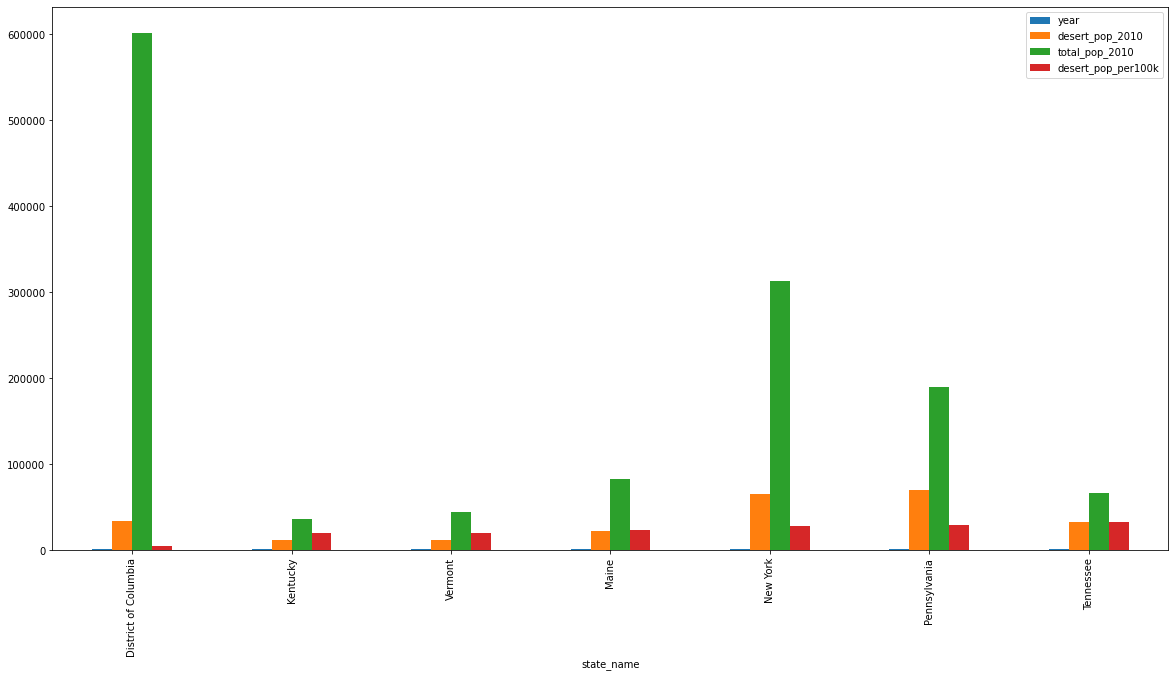

In [39]:
leastdeserts.plot(kind='bar', figsize=(20,10))


In [40]:
mostdeserts = desert_df.groupby("state_name").mean().sort_values('desert_pop_per100k', ascending=False).head(7)

<AxesSubplot:xlabel='state_name'>

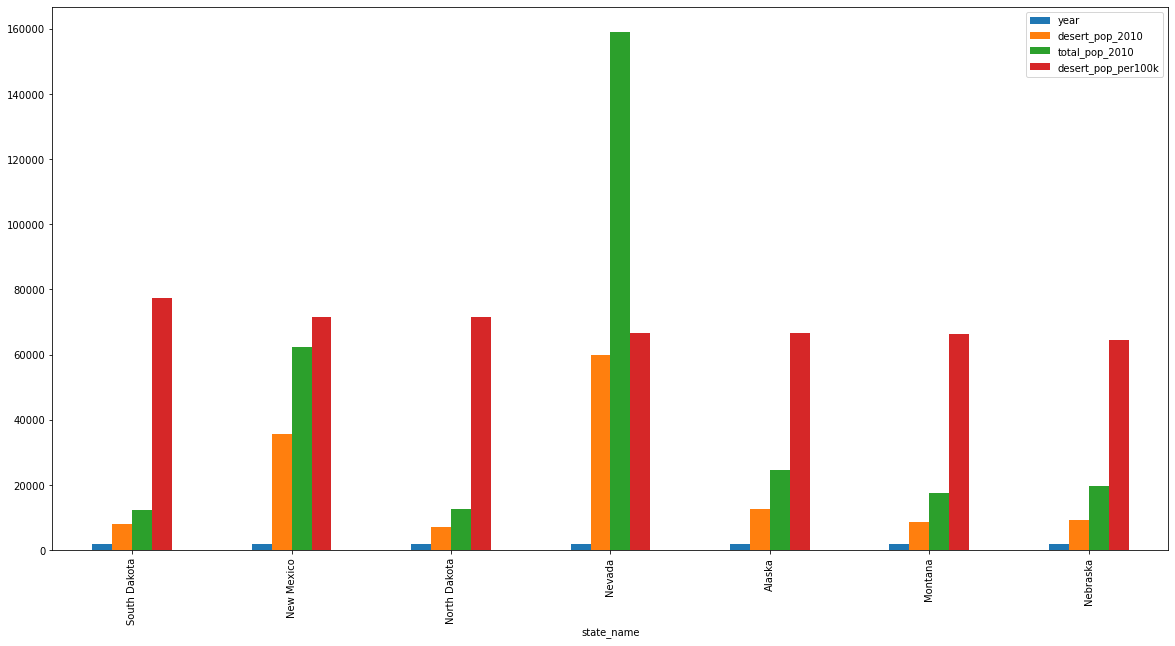

In [41]:
mostdeserts.plot(kind='bar', figsize=(20,10))
